### Question - This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

#### 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
#### 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
#### 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
df.shape

(13, 4)

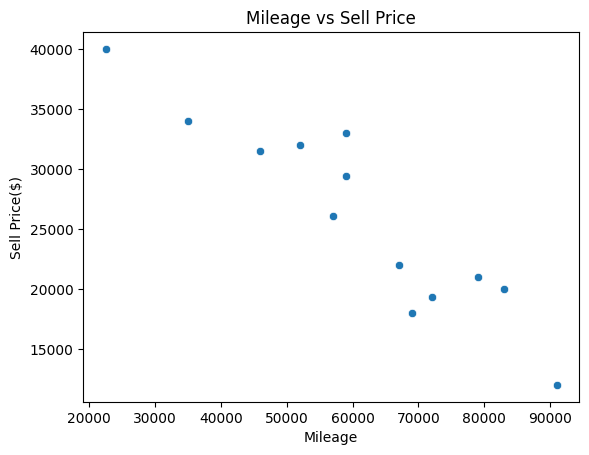

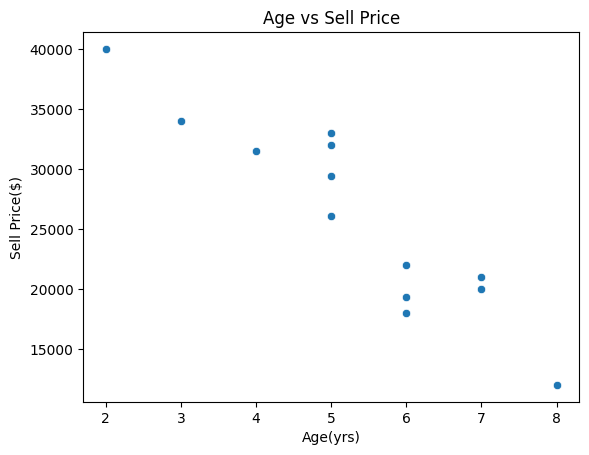

In [7]:
sns.scatterplot(x=df['Mileage'], y=df['Sell Price($)'])
plt.title("Mileage vs Sell Price")
plt.show()

sns.scatterplot(x=df['Age(yrs)'], y=df['Sell Price($)'])
plt.title("Age vs Sell Price")
plt.show()

#### So as we see here that data loosly ek diagonal line ko follow kar raha hai, so point roughly ek downward line form kar rahe hongye, so linear regression is applicable

In [10]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
# using one-hot-encoding
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [14]:
merged = pd.concat([df, dummies], axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


## By Handling Dummy Variable Trap

In [18]:
final = merged.drop(['Car Model', 'Audi A5'], axis = 'columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


### Now bifurcate our dataset into train and test dataset

In [22]:
X = final.drop('Sell Price($)', axis = 1)
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [25]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

#### Now we train our Linear Regression Model on training dataset and check the accuracy on test set

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.score(train_X, train_y)

0.9424316605404253

In [37]:
model.score(test_X, test_y)

0.9001236718716202

In [38]:
model.score(X, y)

0.9357136866767944

#### 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000


In [44]:
model.predict(X)

array([18794.92769827, 34817.68038163, 24495.07304711, 40787.24657126,
       29656.37671437, 26904.05485987, 30675.94663089, 20665.06782946,
       11958.98553965, 26051.78890877, 18196.27683363, 20351.64355993,
       29596.56753131])

In [52]:
input_data = pd.DataFrame([[45000, 4, 0, 1]], columns=X.columns)
model.predict(input_data)

array([36374.39624329])

### 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [55]:
input_data = pd.DataFrame([[86000, 7, 1, 0]], columns=X.columns)
model.predict(input_data)

array([10400.57394156])

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on test data
predictions = model.predict(test_X)

# RMSE
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE:", rmse)

# MAE
mae = mean_absolute_error(test_y, predictions)
print("MAE:", mae)

mse = mean_squared_error(test_y, predictions)
print('MSE:', mse)


RMSE: 1838.0707459338137
MAE: 1734.5548225998782
MSE: 3378504.067057686


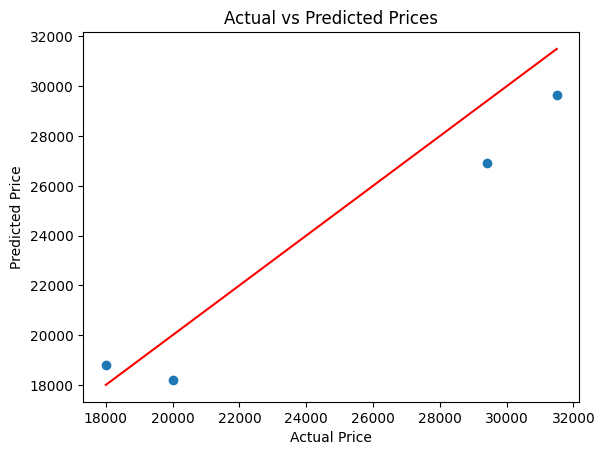

In [62]:
plt.scatter(test_y, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')  # Ideal line
plt.show()

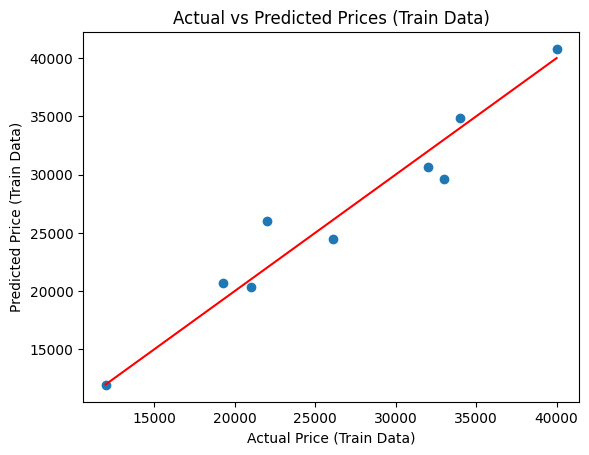

In [63]:
train_predictions = model.predict(train_X)

plt.scatter(train_y, train_predictions)
plt.xlabel("Actual Price (Train Data)")
plt.ylabel("Predicted Price (Train Data)")
plt.title("Actual vs Predicted Prices (Train Data)")
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], color='red')  # Ideal line
plt.show()

In [64]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

,alpha,50
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.1
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [65]:
lasso_reg.score(X, y)

0.9352474613773424

In [66]:
lasso_reg.score(train_X, train_y)

0.9411176270343431

In [67]:
lasso_reg.score(test_X, test_y)

0.9035316227551637

In [68]:
lasso_reg.predict([[45000, 4, 0, 1]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([35836.01889729])

In [69]:
lasso_reg.predict([[86000, 7, 1, 0]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([11653.44524598])

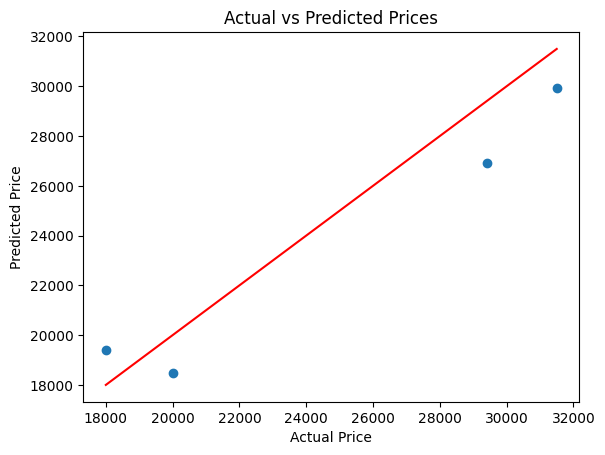

In [72]:
predictions_new = lasso_reg.predict(test_X)

plt.scatter(test_y, predictions_new)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')  # Ideal line
plt.show()